#Midterm Skills Exam: Data Wrangling and Analysis
Submitted by: Dela Cruz, Eugene D.G.

Submitted to: Engr. Roman Richard

Section: CPE22S3

Submitted on: 4/14/2024

Installing the ucimlrepo package and importing the dataset into the code

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [ ]:
X #display the data features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
y #display the data targets

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [13]:
X.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


In [15]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


In [18]:
censusinc_df = pd.concat([X,y], axis=1)
censusinc_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [36]:
# Removing the duplicate rows

censusinc_df.drop_duplicates(inplace=True)

In [35]:
# Check if there is still duplicate rows

duplicates = censusinc_df.duplicated().sum()
duplicates

0

Making numeric values of income in a dataframe


In [47]:
censusinc_df['numeric_income'] = censusinc_df['income'].map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})
censusinc_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,numeric_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,0


Removing typographical errors

In [50]:
censusinc_df.income.replace({'<=50K.': '<=50K','>50K.' : '>50K'},  inplace = True)
censusinc_df.income.unique()

array(['<=50K', '>50K'], dtype=object)

Histograph of each integer values of the data

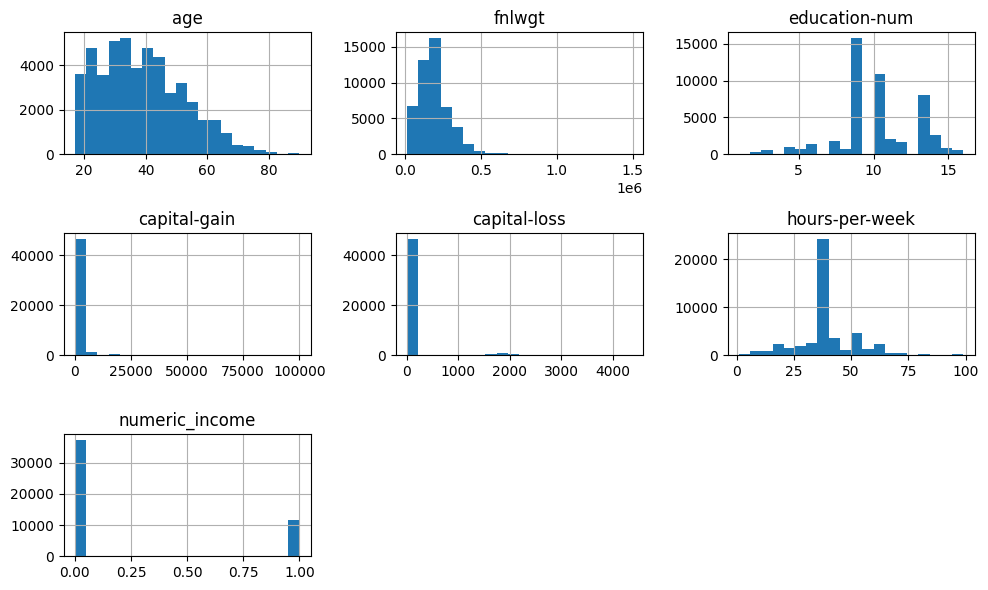

In [51]:
censusinc_df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

Correlation matrix that includes the columns with numerical values only

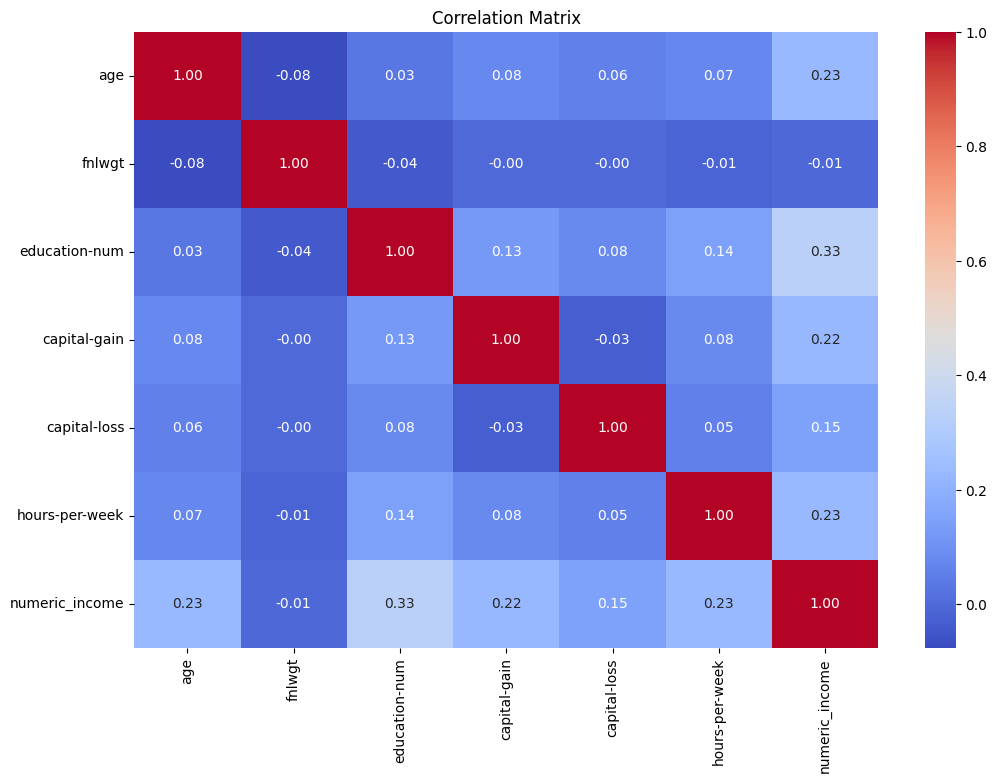

In [65]:
correlation_matrix = censusinc_df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation between age and income


The graph illustrates the correlation between age and income, revealing how income tends to vary with age, providing insights into potential trends or patterns in earnings over the lifespan.

*Note: The 0 on income shows <=50K while the 1 shows the >50K*

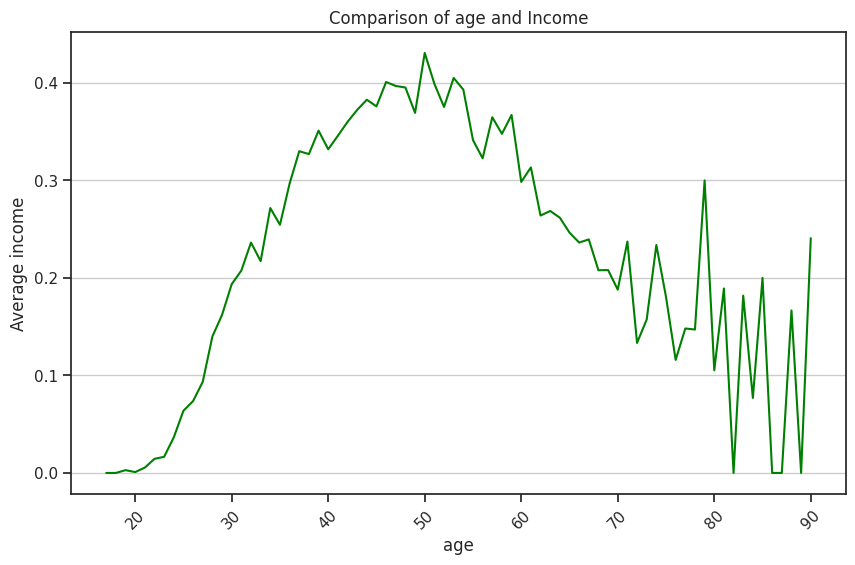

In [84]:
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 6))
age_order = censusinc_df['age'].value_counts().index.sort_values()
age_counts = censusinc_df.groupby('age')['numeric_income'].mean().loc[age_order]
sns.lineplot(x=age_counts.index, y=age_counts.values, color='green')
plt.title('Comparison of age and Income')
plt.xlabel('age')
plt.ylabel('Average income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Correlation between workclass and income

The graph reveals insights into the relationship between individuals' employment status and their earnings. A positive correlation suggests that certain workclass categories may be associated with higher income levels, while a negative correlation may indicate lower income levels.

*Note: The 0 on income shows <=50K while the 1 shows the >50K*

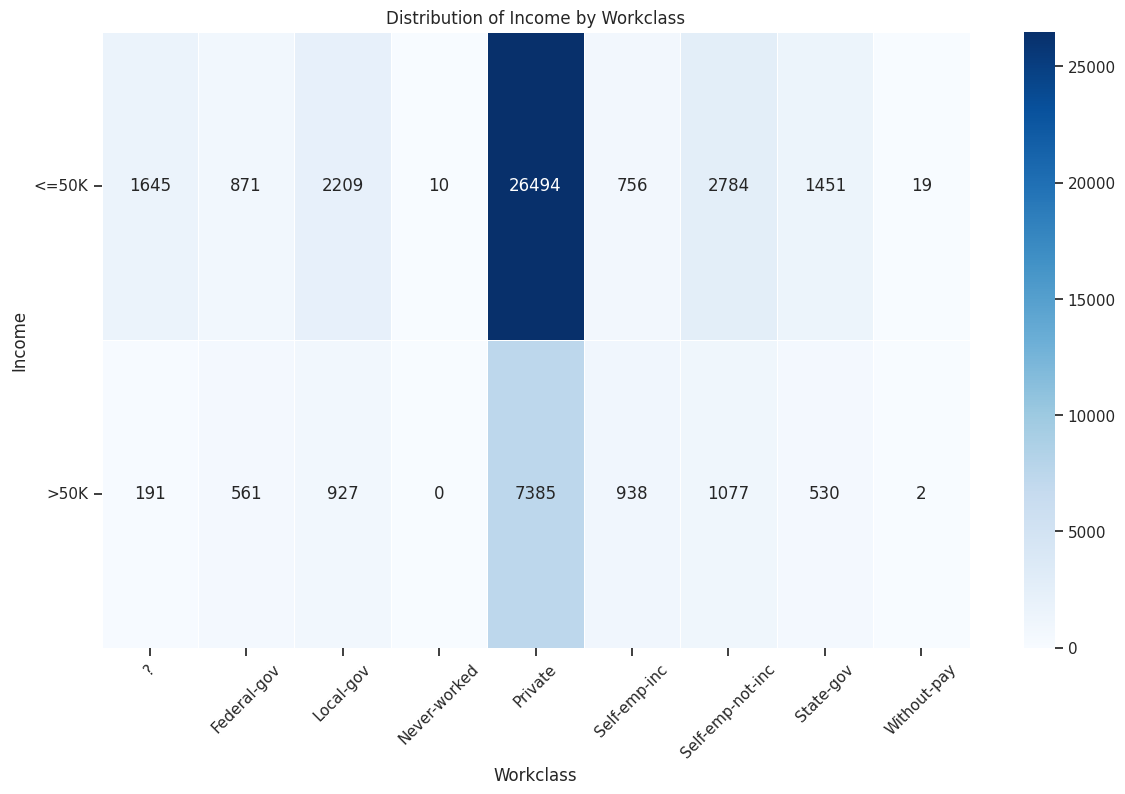

In [82]:
workclass_income_pivot = censusinc_df.pivot_table(index='income', columns='workclass', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(workclass_income_pivot, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Distribution of Income by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Correlation between education and income

The graph illustrates the correlation between education level and the likelihood of earning less than or equal to $50,000 annually. Each education level is represented on the x-axis, while the proportion of individuals earning <=$50k income is depicted on the y-axis. The visual comparison highlights any trends or disparities in income across different education levels, offering insights into the relationship between educational attainment and income stability.

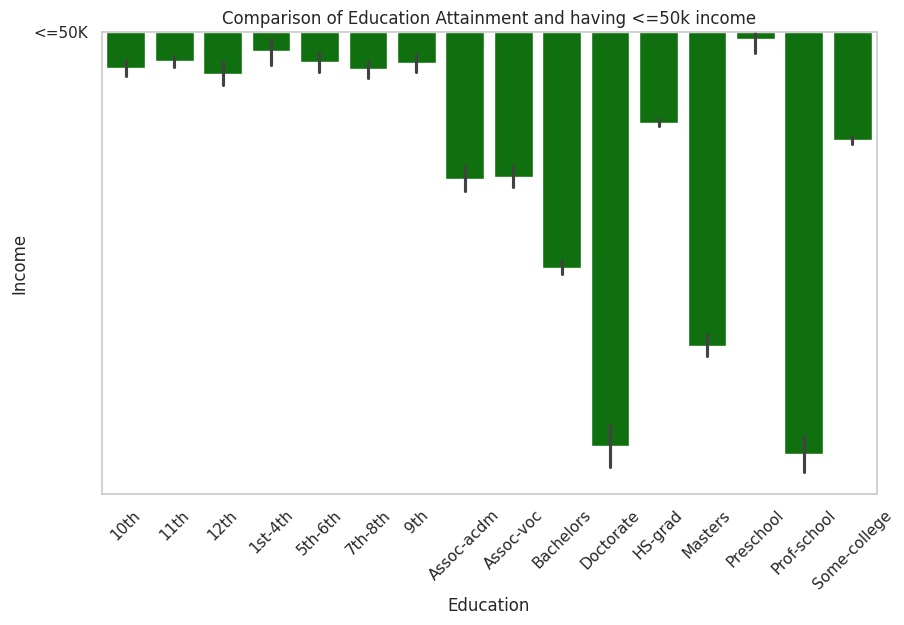

In [118]:
censusinc_df['education_numeric'] = censusinc_df['education'].map({
    '10th': 1, '11th': 2, '12th': 3, '1st-4th': 4,
    '5th-6th': 5, '7th-8th': 6, '9th': 7, 'Assoc-acdm': 8,
    'Masters': 9, 'Preschool': 10, 'Prof-school': 11, 'Some-college': 12
})

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='income', data=censusinc_df, order=censusinc_df['education'].value_counts().index.sort_values(), color='green')
plt.title('Comparison of Education Attainment and having <=50k income')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Correlation between marital-status and income

illustrates the correlation between marital status and income levels within the dataset. Each marital status category is represented along the x-axis, while the y-axis depicts the average income associated with each category. By visually comparing income across different marital statuses, the graph highlights any trends or disparities in income based on marital status. This provides valuable insights into how marital status may influence earning potential or socioeconomic status within the population studied.

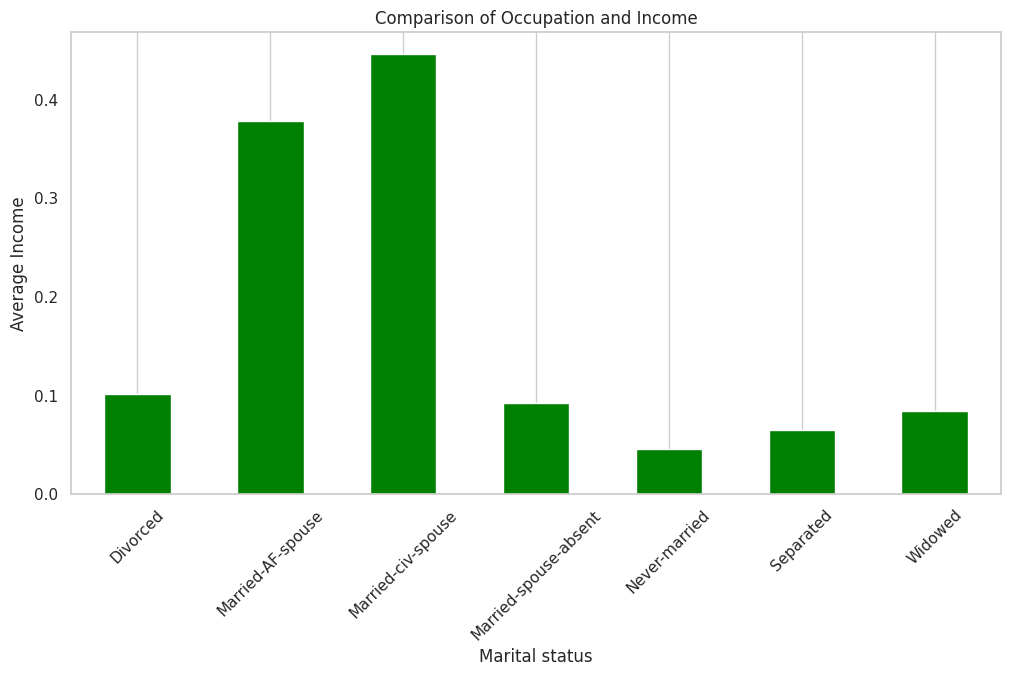

In [132]:
censusinc_df['marital_numeric'] = censusinc_df['marital-status'].map({'Married-civ-spouse': 0, 'Never-married': 1})

plt.figure(figsize=(12, 6))
marital_order = censusinc_df['marital-status'].value_counts().index.sort_values()
marital_counts = censusinc_df.groupby('marital-status')['numeric_income'].mean().loc[marital_order]
marital_counts.plot(kind='bar', color='green')
plt.title('Comparison of Occupation and Income')
plt.xlabel('Marital status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Correlation of Occupation and Income

The graph illustrates the correlation between occupation and income levels within the dataset. By visually comparing income proportions across different occupations, the graph highlights any trends or disparities in income based on occupation type. This provides valuable insights into how occupation may influence earning potential or socioeconomic status within the population studied.

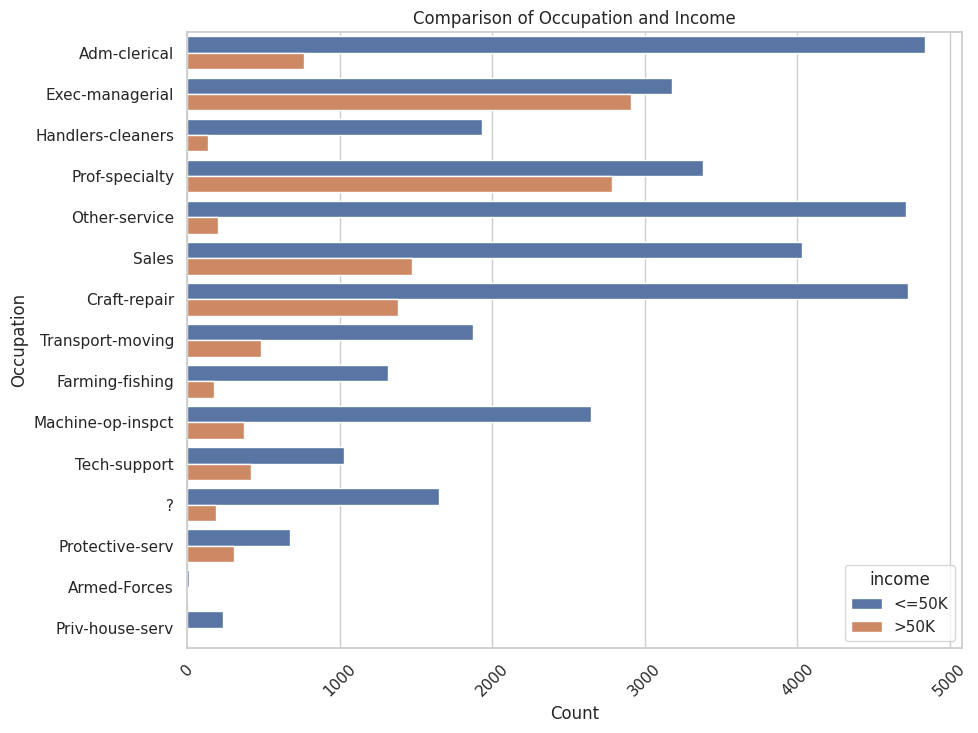

In [143]:
plt.figure(figsize=(10, 8))
sns.countplot(y='occupation', data=censusinc_df, hue='income')
plt.title('Comparison of Occupation and Income')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.show()

Correlation between relationship and income

The graph shows how being in different types of relationships relates to how much money people make. Each type of relationship is shown on the left side, and the average amount of money earned is shown on the bottom. By looking at this graph, we can see if there's a connection between the type of relationship someone has and how much they earn.

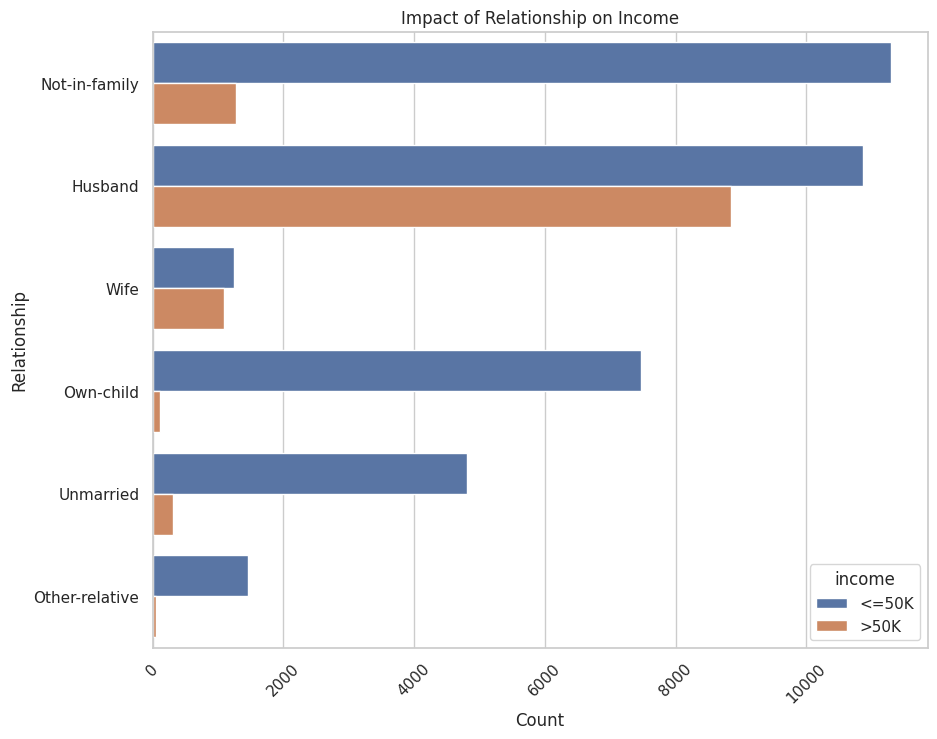

In [140]:
plt.figure(figsize=(10, 8))
sns.countplot(y='relationship', data=censusinc_df, hue='income')
plt.title('Impact of Relationship on Income')
plt.xlabel('Count')
plt.ylabel('Relationship')
plt.xticks(rotation=45)
plt.show()

Correlation of income by sex

illustrates the correlation between sex and income levels within the Census Income dataset. Each bar represents the count of individuals categorized by sex, with segments showing the proportion earning less than or equal to $50,000 (<=50K) and those earning more than $50,000 (>50K).

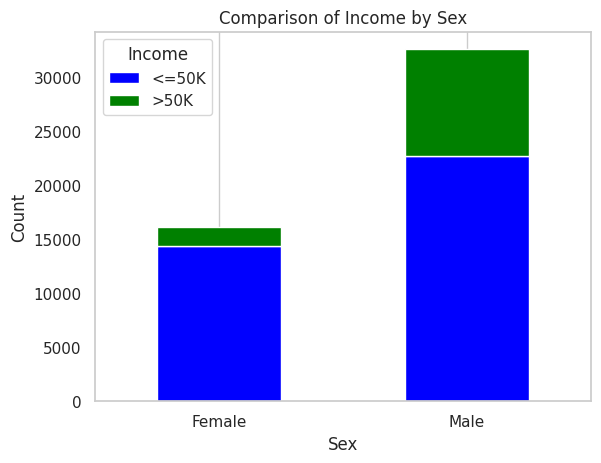

In [148]:
income_counts = censusinc_df.groupby(['sex', 'income']).size().unstack()

income_counts.plot(kind='bar', stacked=True, color=['blue', 'green'])
plt.title('Comparison of Income by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.grid(axis='y')
plt.show()

Correlation between race and income

The graph visualizes the impact of race on income levels within the dataset. Each bar represents the average income associated with a specific race category. By examining the heights of the bars, we can observe any disparities or patterns in income distribution across different racial groups.

<Figure size 800x600 with 0 Axes>

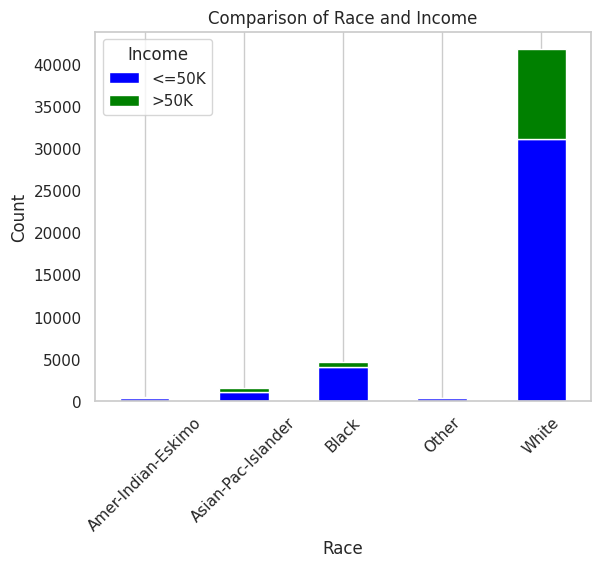

In [160]:
plt.figure(figsize=(8, 6))
income_counts = censusinc_df.groupby(['race', 'income']).size().unstack()
income_counts.plot(kind='bar', stacked=True, color=['blue', 'green'])

plt.title('Comparison of Race and Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.grid(axis='y')
plt.show()

Correlation between capital-gain and income

This graph looks at how capital gains relate to different income levels. It helps us see how money earned from investments affects how much money people have overall and how they build up their wealth. Understanding this connection can give us ideas about how to plan our finances and make smart investment choices.

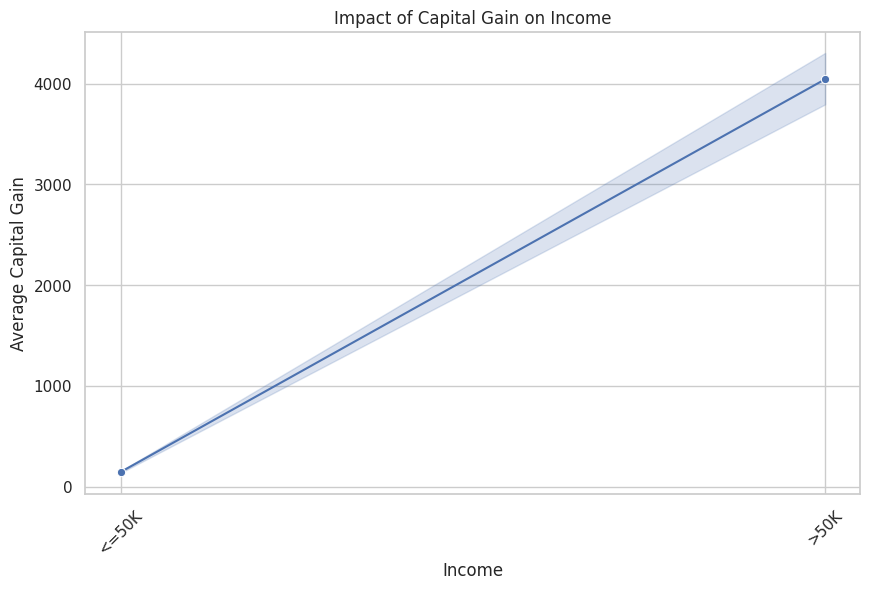

In [163]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='income', y='capital-gain', data=censusinc_df, marker='o')
plt.title('Impact of Capital Gain on Income')
plt.xlabel('Income')
plt.ylabel('Average Capital Gain')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Correlation between capital-loss and income


This graph looks at how losing money in investments relates to different income levels. It helps us see how losing money affects overall income and financial stability. Understanding this connection can help us manage risks better and make smarter investment decisions.

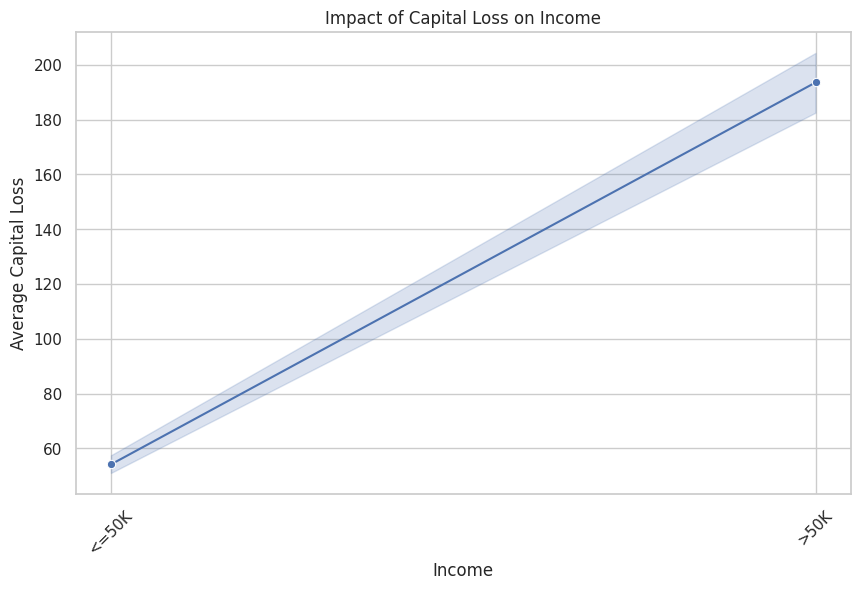

In [164]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='income', y='capital-loss', data=censusinc_df, marker='o')
plt.title('Impact of Capital Loss on Income')
plt.xlabel('Income')
plt.ylabel('Average Capital Loss')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Correlation between hours-per-week and income

displays the relationship between hours worked per week and income levels within the dataset. Each point represents an individual, with their weekly work hours on the x-axis and their income on the y-axis. The plot allows us to visually examine whether there's a correlation between working longer hours and earning higher income.

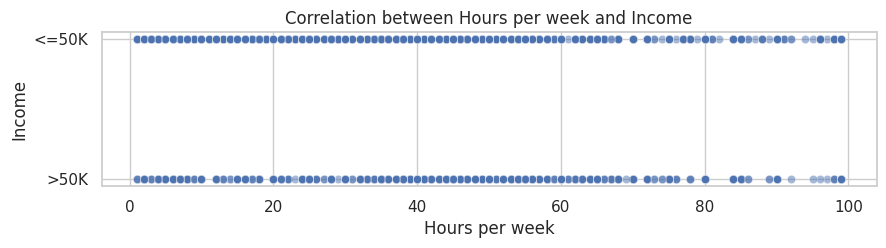

In [172]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 2))
sns.scatterplot(x=censusinc_df['hours-per-week'], y=censusinc_df['income'], alpha=0.5)
plt.title('Correlation between Hours per week and Income')
plt.xlabel('Hours per week')
plt.ylabel('Income')
plt.grid(True)
plt.show()

Correlation between native-country and income


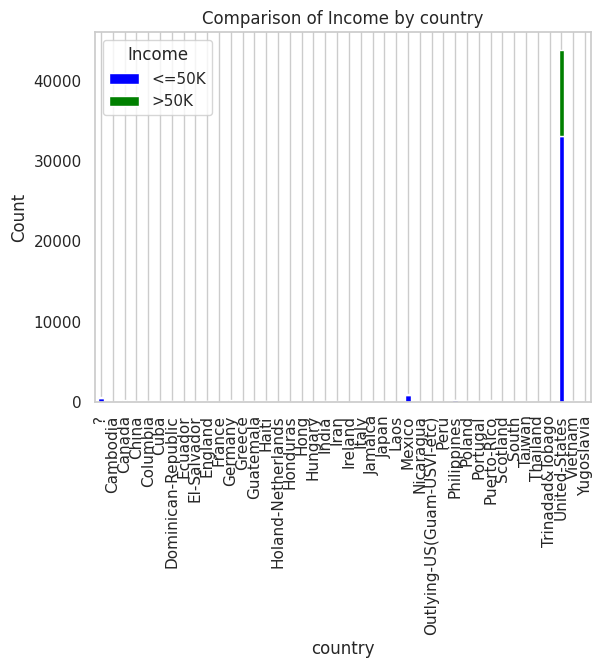

In [180]:
country_counts = censusinc_df.groupby(['native-country', 'income']).size().unstack()

country_counts.plot(kind='bar', stacked=True, color=['blue', 'green'])
plt.title('Comparison of Income by country')
plt.xlabel('country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.grid(axis='y')
plt.show()